In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


In [28]:
a = np.arange(0,1000,10)
b = np.random.random((len(a)))

[Text(0, 0, '−200'),
 Text(0, 0, '0 m , 0.001 s'),
 Text(0, 0, '0 m , 0.201 s'),
 Text(0, 0, '0 m , 0.401 s'),
 Text(0, 0, '0 m , 0.601 s'),
 Text(0, 0, '0 m , 0.801 s'),
 Text(0, 0, '0 m , 1.001 s'),
 Text(0, 0, '0 m , 1.201 s')]

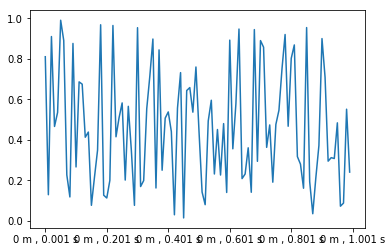

In [91]:
fig , ax = plt.subplots()
ax.plot(a,b)
ax.set_xticklabels(newlabs)


In [32]:
ax.get_xticks()

array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.])

In [86]:
newlabs = [ms2str(item.get_text()) for item in ax.get_xticklabels()]

In [47]:
list(map(lambda x : x.get_text()[0] ,ax.get_xticklabels()))

['−', '0', '2', '4', '6', '8', '1', '1']

In [85]:

def ms2str(millisec_str):
    try:
        millisec = int(millisec_str)
    except ValueError:
        return millisec_str
        
    s = millisec / 1000
    m = int(s // 60)
    rem = round(s % 60,3)

In [78]:
ms2str(143432)

'2 m , 23.432 s'

In [84]:
int('−200')

ValueError: invalid literal for int() with base 10: '−200'

C:\Users\magnu\anaconda3\envs\DLC-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\magnu\anaconda3\envs\DLC-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\magnu\anaconda3\envs\DLC-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\magnu\anaconda3\envs\DLC-GPU\lib\site-packages\tensorflow\

Loading binary data from C:\Users\magnu\OneDrive\Dokument\KTH\2020HT\DD2430_-_Project_Course_in_Data_Science\sharing\20201202_behaviour2020_v_6287_distractionduring_task_vol2_1\20201202_behaviour2020_v_6287_distractionduring_task_vol2_1_pose_data.npy
Extracting events from C:\Users\magnu\OneDrive\Dokument\KTH\2020HT\DD2430_-_Project_Course_in_Data_Science\sharing\20201202_behaviour2020_v_6287_distractionduring_task_vol2_1\20201202_behaviour2020_v_6287_distractionduring_task_vol2_1_data.csv...
Extracted events!
66440.0
67439.0


C:\Users\magnu\OneDrive\Dokument\KI\KI2020\src\dlc_pipeline.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[idx] = np.rad2deg(df[idx])
C:\Users\magnu\OneDrive\Dokument\KI\KI2020\src\dlc_pipeline.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[idx] = np.rad2deg(df[idx])
No handles with labels found to put in legend.


{'Pump': {0: [67002], 1: [66853]}, 'TrialLED': {1: [66856], 0: []}, 'TrialBox': {1: []}, 'RewardLED': {2: [], 0: [66852]}, 'RewardBox': {1: [66852]}}
Saving figure...


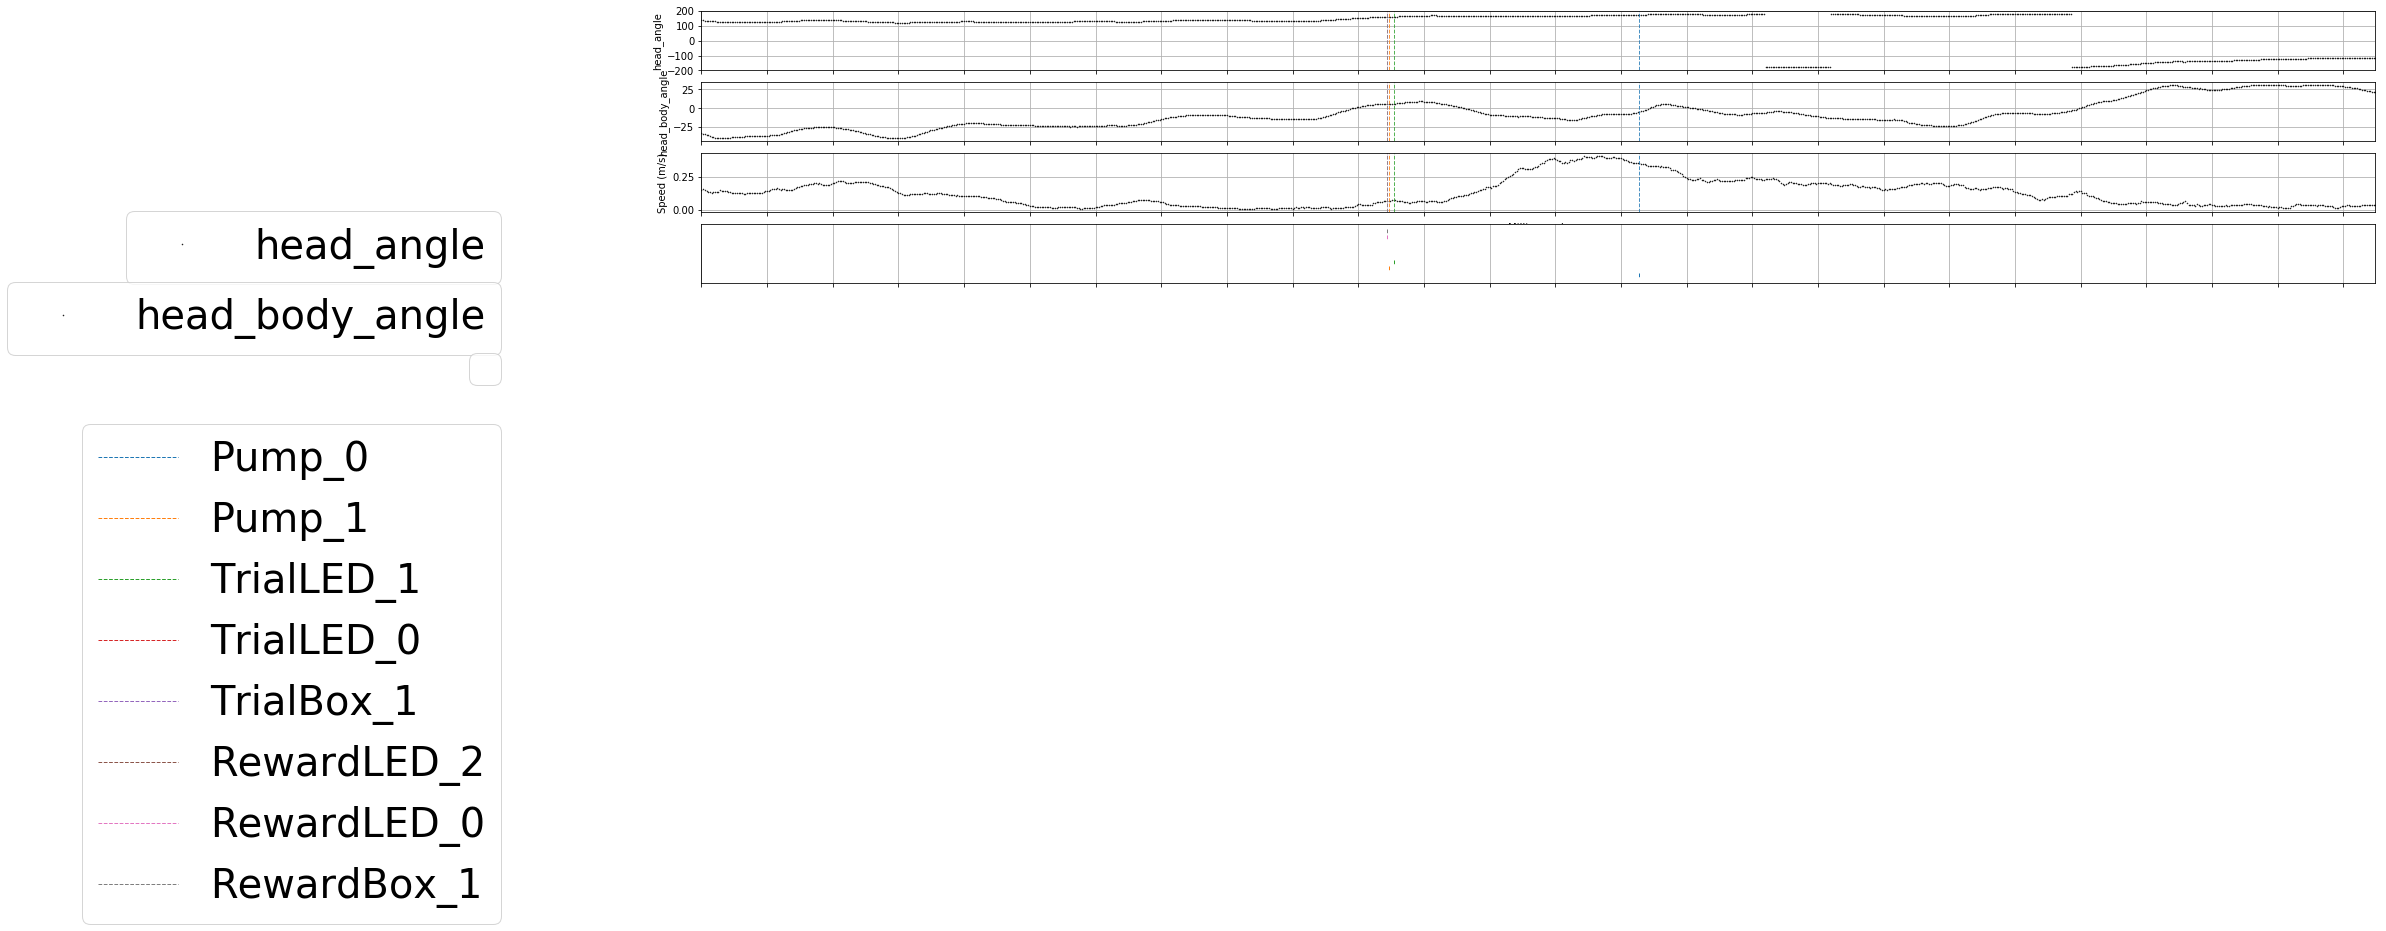

In [88]:
from dlc_pipeline import triple_plot , extract_events , partition_data
from dlc_analysis import PoseExtractor
import matplotlib.pyplot as plt 
import os
import numpy as np
import pandas as pd

src = os.path.normpath(r'C:\Users\magnu\OneDrive\Dokument\KTH\2020HT\DD2430_-_Project_Course_in_Data_Science\sharing\20201202_behaviour2020_v_6287_distractionduring_task_vol2_1')
savefile_binary = os.path.join(src,'20201202_behaviour2020_v_6287_distractionduring_task_vol2_1_pose_data.npy')
event_filename = os.path.join(src,'20201202_behaviour2020_v_6287_distractionduring_task_vol2_1_data.csv')

pose = PoseExtractor(None,None)
df = pose.create_df(savefile_binary)
events = extract_events(event_filename)

tmp_df , tmp_events = partition_data(df,events,1000,63)

triple_plot(tmp_df,['frame'],['head_angle','head_body_angle'],'test.png',tmp_events,figsize=(30,5),labelsize=5,showplot=False)